In [91]:
#%matplotlib qt

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import ZebraLib as zb
from scipy.optimize import curve_fit

class cilindro():
    def __init__(self, d, k, c, L, p, h):
        self.d = d
        self.k = k
        self.c = c
        self.L = L
        self.p = p
        self.h = h

    @property
    def bi(self):
        r = self.d/2
        V = np.pi*r**2*self.L
        As = 2*np.pi*r*(self.L+r)
        Lc = V/As
        return self.h*Lc/self.k

    @property
    def tau(self):
        r = self.d/2
        V = np.pi*(r**2)*self.L
        As = 2*np.pi*r*(self.L+r)
        return (self.p*self.c*V)/(self.h*As)

def T(E):
    return 4.0 + 22.9*E

def dist_temp(t, tau, ti, t_inf):
    return ((np.e**(-t/tau))*(ti - t_inf)) + t_inf

### Plot dos resultados experimentais

In [92]:
#import dos dados
df = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TCM I/Relatório_4/dados_brutos_mV.xlsx')

#Transformando os mv em C
df2 = pd.DataFrame({'ca1':T(df.ca1), 'cr1':T(df.cr1), 'ca2':T(df.ca2), 'cr2':T(df.cr2), 
                    'ca3':T(df.ca3), 'cr3':T(df.cr3), 'ca4':T(df.ca4), 'cr4':T(df.cr4)})
                    
#df2

### Plot do aquecimento e resfriamento 4 cilindros - $$T_{\infty}=40ºC$$

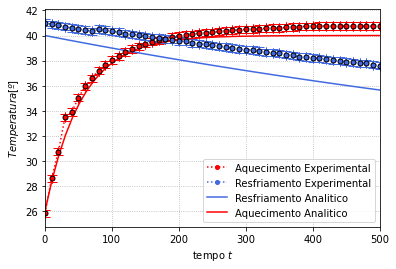

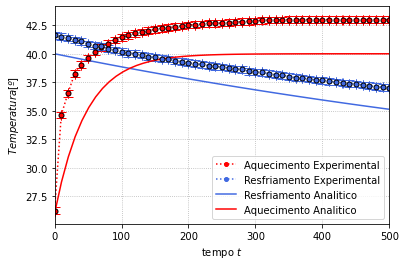

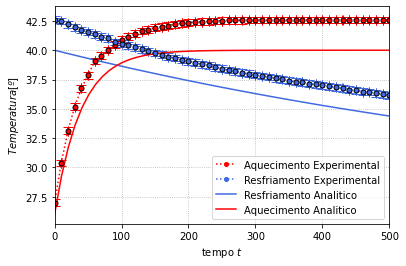

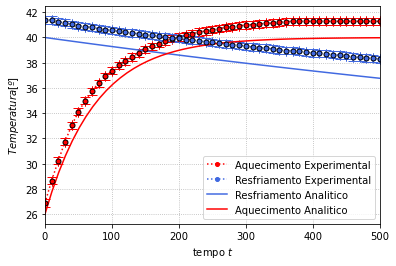

In [93]:
ca1 = cilindro(0.05, 237, 896, 0.200, 2707, 500)
ca2 = cilindro(0.05, 237, 896, 0.085, 2707, 500)
ca3 = cilindro(0.035, 237, 896, 0.200, 2707, 500)
ca4 = cilindro(0.05, 413, 383, 0.200, 8954, 500)

cr1 = cilindro(0.05, 237, 896, 0.200, 2707, 20)
cr2 = cilindro(0.05, 237, 896, 0.085, 2707, 20)
cr3 = cilindro(0.035, 237, 896, 0.200, 2707, 20)
cr4 = cilindro(0.05, 413, 383, 0.200, 8954, 20)

cr = [cr1, cr2, cr3, cr4]
ca = [ca1, ca2, ca3, ca4]

crd = [df.cr1, df.cr2, df.cr3, df.cr4]
cad = [df.ca1, df.ca2, df.ca3, df.ca4]

t = np.linspace(0.1, 500)

for i in range(len(cr)):

    fig, ax = plt.subplots()
    
    ax.set(xlim=(0, 500), xlabel = r'tempo $t$', ylabel = r'$Temperatura [º]$')

    #DADOS AQUECIMENTO
    ax.plot(df.tempo, T(cad[i]), label = "Aquecimento Experimental", c='red', marker='o', markersize=4, ls=':')
    ax.errorbar(df.tempo, T(cad[i]), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
        markerfacecolor='red', markersize=5, capsize=5, ecolor='red')

    #DADOS RESFRIAMENTO
    ax.plot(df.tempo,  T(crd[i]), label = "Resfriamento Experimental",  c='royalblue', marker='o', markersize=4, ls=':')
    ax.errorbar(df.tempo,  T(crd[i]), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
        markerfacecolor='royalblue', markersize=5, capsize=5, ecolor='royalblue')

    #ANALITICO - RESFRIAMENTO E AQUECIMENTO
    ax.plot(t, dist_temp(t, cr[i].tau, 40, 26), label = "Resfriamento Analitico", c='royalblue')
    ax.plot(t, dist_temp(t, ca[i].tau, 26, 40), c='red', label = "Aquecimento Analitico")

    ax.grid(ls='dotted')
    ax.legend()
    fig.savefig(f'figura{i+1}.pdf', bbox_inches='tight')


### Plot do aquecimento e resfriamento 4 cilindros - $$T_{\infty}=41ºC$$

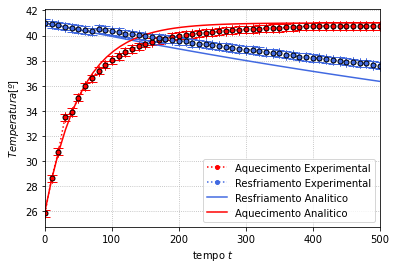

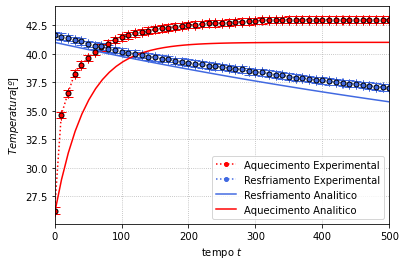

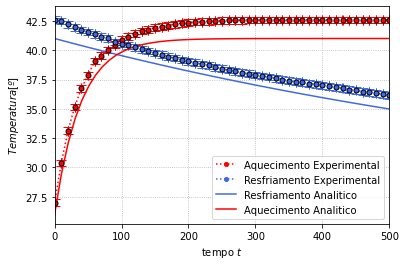

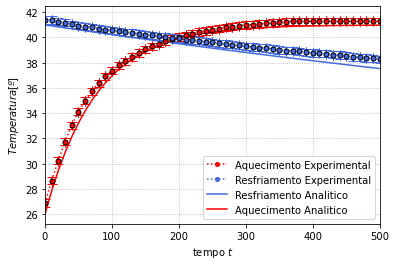

In [94]:
ca1 = cilindro(0.05, 237, 896, 0.200, 2707, 500)
ca2 = cilindro(0.05, 237, 896, 0.085, 2707, 500)
ca3 = cilindro(0.035, 237, 896, 0.200, 2707, 500)
ca4 = cilindro(0.05, 413, 383, 0.200, 8954, 500)

cr1 = cilindro(0.05, 237, 896, 0.200, 2707, 20)
cr2 = cilindro(0.05, 237, 896, 0.085, 2707, 20)
cr3 = cilindro(0.035, 237, 896, 0.200, 2707, 20)
cr4 = cilindro(0.05, 413, 383, 0.200, 8954, 20)

cr = [cr1, cr2, cr3, cr4]
ca = [ca1, ca2, ca3, ca4]

crd = [df.cr1, df.cr2, df.cr3, df.cr4]
cad = [df.ca1, df.ca2, df.ca3, df.ca4]

t = np.linspace(0.1, 500)

for i in range(len(cr)):

    fig, ax = plt.subplots()
    
    ax.set(xlim=(0, 500), xlabel = r'tempo $t$', ylabel = r'$Temperatura [º]$')

    #DADOS AQUECIMENTO
    ax.plot(df.tempo, T(cad[i]), label = "Aquecimento Experimental", c='red', marker='o', markersize=4, ls=':')
    ax.errorbar(df.tempo, T(cad[i]), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
        markerfacecolor='red', markersize=5, capsize=5, ecolor='red')

    #DADOS RESFRIAMENTO
    ax.plot(df.tempo,  T(crd[i]), label = "Resfriamento Experimental",  c='royalblue', marker='o', markersize=4, ls=':')
    ax.errorbar(df.tempo,  T(crd[i]), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
        markerfacecolor='royalblue', markersize=5, capsize=5, ecolor='royalblue')

    #ANALITICO - RESFRIAMENTO E AQUECIMENTO
    ax.plot(t, dist_temp(t, cr[i].tau, 41, 26), label = "Resfriamento Analitico", c='royalblue')
    ax.plot(t, dist_temp(t, ca[i].tau, 26, 41), c='red', label = "Aquecimento Analitico")

    ax.grid(ls='dotted')
    ax.legend()
    fig.savefig(f'figura{i+1}.pdf', bbox_inches='tight')

### Todas as curvas de aquecimento

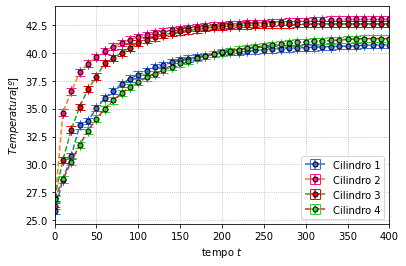

In [95]:
fig, ax = plt.subplots()

ax.set(xlim=(0, 400), xlabel = r'tempo $t$', ylabel = r'$Temperatura [º]$')

t = np.linspace(0.1, 10)

ax.errorbar(df.tempo, T(df.ca1), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='royalblue', markersize=5, capsize=5, ecolor='royalblue', ls='--', label='Cilindro 1')
ax.errorbar(df.tempo, T(df.ca2), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='deeppink', markersize=5, capsize=5, ecolor='deeppink', ls='--', label='Cilindro 2')
ax.errorbar(df.tempo, T(df.ca3), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='red', markersize=5, capsize=5, ecolor='red', ls='--', label='Cilindro 3')
ax.errorbar(df.tempo, T(df.ca4), xerr=.01/(3)**0.5, yerr=0.5/(3)**0.5, fmt='o', markeredgecolor='black', 
    markerfacecolor='limegreen', markersize=5, capsize=5, ecolor='limegreen', ls='--', label='Cilindro 4')

ax.grid(ls='dotted')
ax.legend()

fig.savefig('aquecimento.pdf', bbox_inches='tight')

### Todas as curvas de resfriamento

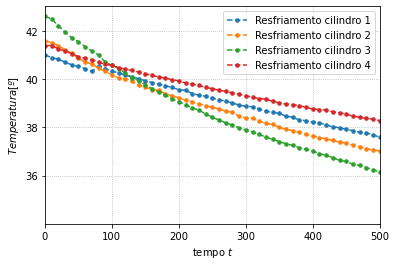

In [96]:
fig, ax = plt.subplots()

ax.set(xlim=(0, 500), xlabel = r'tempo $t$', ylabel = r'$Temperatura [º]$')

t = np.linspace(0.1, 10)

ax.plot(df.tempo, T(df.cr1), label = "Resfriamento cilindro 1", marker='o', markersize=3.5, ls='--')
ax.plot(df.tempo, T(df.cr2), label = "Resfriamento cilindro 2", marker='o', markersize=3.5, ls='--')
ax.plot(df.tempo, T(df.cr3), label = "Resfriamento cilindro 3", marker='o', markersize=3.5, ls='--')
ax.plot(df.tempo, T(df.cr4), label = "Resfriamento cilindro 4", marker='o', markersize=3.5, ls='--')

ax.grid(ls='dotted')
ax.legend()

fig.savefig('resfriamento.pdf', bbox_inches='tight')

### Cálculo do numero de Bi

In [97]:
ca1 = cilindro(0.05, 237, 896, 0.200, 2707, 500)
ca2 = cilindro(0.05, 237, 896, 0.085, 2707, 500)
ca3 = cilindro(0.035, 237, 896, 0.200, 2707, 500)
ca4 = cilindro(0.05, 413, 383, 0.200, 8954, 500)

cr1 = cilindro(0.05, 237, 896, 0.200, 2707, 20)
cr2 = cilindro(0.05, 237, 896, 0.085, 2707, 20)
cr3 = cilindro(0.035, 237, 896, 0.200, 2707, 20)
cr4 = cilindro(0.05, 413, 383, 0.200, 8954, 20)

cr = [cr1.tau, cr2.tau, cr3.tau, cr4.tau]
ca = [ca1.tau, ca2.tau, ca3.tau, ca4.tau]

pd.DataFrame({'a':ca, 'b':cr})

,a,b
0,53.899378,1347.484444
1,46.855709,1171.392727
2,39.030584,975.764598
3,76.208489,1905.212222


### Gerando os dados analíticos

In [98]:
t = np.linspace(0.1, 500, 109)

A1 = dist_temp(t, ca1.tau, 42, 26)
A2 = dist_temp(t, ca2.tau, 42, 26)
A3 = dist_temp(t, ca3.tau, 42, 26)
A4 = dist_temp(t, ca4.tau, 42, 26)

C1 = dist_temp(t, cr1.tau, 26, 42)
C2 = dist_temp(t, cr2.tau, 26, 42)
C3 = dist_temp(t, cr3.tau, 26, 42)
C4 = dist_temp(t, cr4.tau, 26, 42)

cr = [C1, C2, C3, C4]
ca = [A1, A2, A3, A4]

df = pd.DataFrame({'A1':A1, 'A2':A2, 'A3':A3, 'A4':A4, 'C1':C1, 'C2':C2, 'C3':C3, 'C4':C4})
df
#df.to_excel('D:/UNESP/EngMec-UNESP/Lab. TCM I/Relatório_4/dados_analitico.xlsx')

,A1,A2,A3,A4,C1,C2,C3,C4
0,41.970343,41.965889,41.959059,41.979019,26.001187,26.001366,26.001640,26.000840
1,40.656100,40.464078,40.174363,41.037381,26.056050,26.064459,26.077351,26.039662
2,39.450011,39.103532,38.589249,40.151233,26.110725,26.127303,26.152704,26.078391
3,38.343173,37.870965,37.181398,39.317306,26.165212,26.189900,26.227700,26.117025
4,37.327421,36.754338,35.930986,38.532522,26.219512,26.252249,26.302341,26.155566
...,...,...,...,...,...,...,...,...
104,26.002111,26.000551,26.000070,26.028857,30.807239,31.392596,32.231678,29.573035
105,26.001938,26.000499,26.000062,26.027156,30.845621,31.434428,32.277906,29.603189
106,26.001778,26.000452,26.000055,26.025556,30.883872,31.476095,32.323915,29.633271
107,26.001632,26.000410,26.000049,26.024050,30.921991,31.517598,32.369706,29.663279
